<a href="https://colab.research.google.com/github/raylinpeguero78/Genero-por-Nombre/blob/main/Name_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
df= pd.read_csv("name_gender_dataset.csv")
df

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09


In [3]:
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB
None


In [7]:
df.shape

(147269, 4)

In [6]:
df.columns

Index(['Name', 'Gender', 'Count', 'Probability'], dtype='object')

In [5]:
df.isnull


<bound method DataFrame.isnull of            Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]>

In [9]:
df.count

<bound method DataFrame.count of            Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]>

In [8]:
df.iloc[0:5]

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [10]:
df[['Name','Gender',"Probability"]].head()

,Name,Gender,Probability
0,James,M,0.014517
1,John,M,0.014398
2,Robert,M,0.013603
3,Michael,M,0.012534
4,William,M,0.011567


# Formula P(Género | Nombre) = e^β0 + β1 * Nombre / (1 + e^β0 + β1 * Nombre)




In [107]:

genero = ['M','M','M','M','M']
nombre = ['James','John','Robert','Michael','William']

nombre = pd.DataFrame(   {'James','John','Robert','Michael','William','Maria','Hillary'})
#resultado= pd.Categorical(nombre)
#resultado = pd.Categorical(genero)

nueva =  {'Nombre': 'Maria','Género': 'F'  }
apellido= {      'Nombre' 'Hillary','Género''F'}
#resultado
nombre = nombre.append(nueva, ignore_index=True)


nombre

<ipython-input-107-ae8d30631f71>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nombre = nombre.append(nueva, ignore_index=True)


,0,Nombre,Género
0,John,NaN,NaN
1,Michael,NaN,NaN
2,William,NaN,NaN
3,James,NaN,NaN
4,Robert,NaN,NaN
5,Maria,NaN,NaN
6,Hillary,NaN,NaN
7,NaN,Maria,F


In [108]:


genero = ['M','M','M','M','F',"F"]
nombre = ['James','John','Robert','Michael','William','Maria','Hillary']
probabilidades = [0.014517,0.014398,0.013603,0.012534,]


b0 = 0.5
b1 = 1.0

# Calcular las probabilidades usando la fórmula de regresión logística
probabilidades = [np.exp(b0 + b1 * len(n)) / (1 + np.exp(b0 + b1 * len(n))) for n in nombre]

print(probabilidades)



[0.9959298622841039, 0.9890130573694068, 0.998498817743263, 0.9994472213630764, 0.9994472213630764, 0.9959298622841039, 0.9994472213630764]


In [161]:


genero = ['M','M','M','M','M','F','F']
nombre = ['James','John','Robert','Michael','William']
probabilidades = [0.014517,0.014398,0.013603,0.012534,0.011567]


b0 = 0.5
b1 = 1.0

# Calcular las probabilidades usando la fórmula de regresión logística
probabilidades = [np.exp(b0 + b1 * len(n)) / (1 + np.exp(b0 + b1 * len(n))) for n in nombre]

print(probabilidades)



[0.9959298622841039, 0.9890130573694068, 0.998498817743263, 0.9994472213630764, 0.9994472213630764]


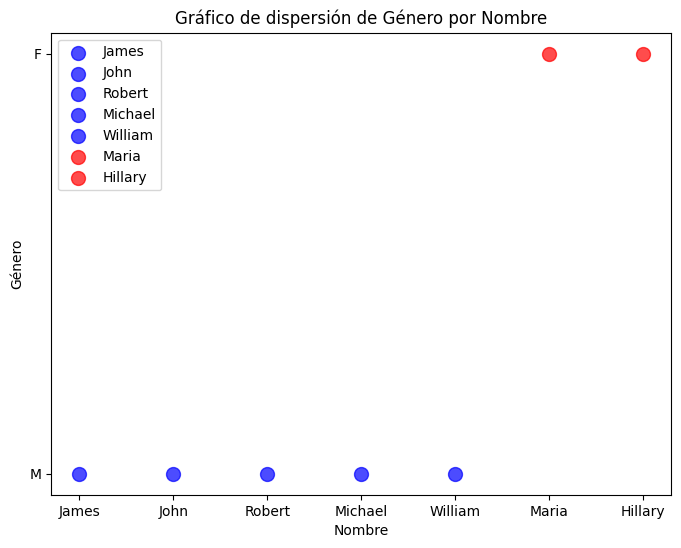

In [213]:

plt.figure(figsize=(8, 6))
for i in range(len(nombre)):

    plt.scatter(nombre[i], genero[i], color=point_colors[i], s=100, alpha=0.7, label=nombre[i])
plt.title('Gráfico de dispersión de Género por Nombre')
plt.xlabel('Nombre')
plt.ylabel('Género')
plt.legend()



In [115]:
model = LogisticRegression()

In [136]:




# Datos de características (X) y etiquetas (Y)
nombres = ['James', 'John', 'Robert', 'Michael', 'William', 'Maria', 'Hillary']
generos = ['M', 'F', 'M', 'F', 'M', 'F', 'M']

# Convierte los géneros a valores numéricos (0 para 'M' y 1 para 'F')
Y = np.array([0 if genero == 'M' else 1 for genero in generos])

# Extrae la longitud de cada nombre como características (X)
X = np.array([len(nombre) for nombre in nombres]).reshape((-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar el modelo solo si hay al menos dos clases distintas en los datos de entrenamiento
if len(np.unique(Y_train)) > 1:
    # Crear y entrenar el modelo
    model = LogisticRegression()
    model.fit(X_train, Y_train)
else:
    print("No se puede entrenar el modelo porque solo hay una clase presente en los datos de entrenamiento.")



In [137]:
model.fit(X_train,Y_train)

LogisticRegression()

In [138]:
predictions = model.predict(X_test)
print("Predicciones del modelo:", predictions)

Predicciones del modelo: [1 1]
